# Data Analysis

Analyze and clean initial raw data. Convert it into workable format.

In [2]:
# import modules
import io
import math
import numpy
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# setting up directory paths
working_dir = Path('/Users/migineishvilin2/Documents/urfp_project')
data_dir = working_dir.joinpath('data')
anal_dir = working_dir.joinpath('analysis_notebooks')

# setting up file paths
data_file = data_dir.joinpath('raw_data.csv')

In [4]:
# importing data into DataFrame
df_data = pd.read_csv(data_file, low_memory=False)

In [5]:
print("Number of Rows:", df_data.shape[0])
print("Number of Columns:", df_data.shape[1])

Number of Rows: 4953
Number of Columns: 304


In [6]:
# go through each column and check it there's missing data
for i in range(df_data.shape[1]):
    if (len((df_data[df_data.columns[i]]).dropna())) != df_data.shape[0]:
        print(len((df_data[df_data.columns[i]]).dropna()), df_data.columns[i])

4945 q2a1
4951 q2a2
4949 q2a3
4943 q3a1
4950 q3a2
4948 q3a3
4952 q17d1
4951 q18c1
4925 q18d
4952 q18j
4951 q18k
4948 q18l
4952 q19a8
4951 g4b1
4952 q21b1
4951 q21c1


In [7]:
# go through each column and check for number of given answers (how repetitive are answers)
for i in range(df_data.shape[1]):
    if len((df_data[df_data.columns[i]]).drop_duplicates()) >= 20:
        print(len((df_data[df_data.columns[i]]).drop_duplicates()), df_data.columns[i])
       # print(df_data[df_data.columns[i]].drop_duplicates())

27 cid
4953 sjsid
2309 q2a1
2372 q2a2
2174 q2a3
2064 q3a1
2018 q3a2
1804 q3a3
476 q12a1
360 q12a2
488 q12b1
535 q12b2
64 q15d
214 q17d1
95 q18a6
152 q18c1
1353 q18d
176 q18e7
71 q18g
2187 Zip
2313 q18h
130 q18i1
394 q18j
439 q18k
473 q18l
1397 q19a8
22 g4b1
71 q21b1
87 q21c1
20 q22e9
23 q23a2
22 q23a4
227 q23b1
1936 zcta
914 postoff
356 county
51 st
50 state
50 statefips
405 staco
1423 sqmi
1862 zpop09
1877 zpop09sqmi
1853 zpop10
1843 zwhite10
1681 zblack10
747 zamind10
1518 zasianpi10
1817 zmale10
1834 zfemale10
1855 znothisp10
1738 zhisp10
240 cbsa
239 cbsaname
79 csa
79 csaname
404 popden
404 logpd
29 r_q2a1
29 r_q2a2
29 r_q2a3
29 r_q3a1
29 r_q3a2
29 r_q3a3
22 q5scale
22 q6scale
25 q7scale
56 q8scale
53 q9scale
55 q10scale
32 q11scale
50 q14scale
1361 Bminumber
70 Age
70 age18


In [8]:
# since there aren't that many cells with missing data, we will just omit all the responses that have missing data
df_data = df_data.dropna()

In [9]:
print("Number of Rows:", df_data.shape[0])
print("Number of Columns:", df_data.shape[1])

Number of Rows: 4896
Number of Columns: 304


In [10]:
# count all the rows with spaces
count = 0
for i in range(df_data.shape[1]):
    if ' ' in df_data[df_data.columns[i]].values:
        count = count + list(df_data[df_data.columns[i]].values.flatten()).count(' ')

print(count)

416514


/Users/migineishvilin2/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


## Data Observations

In [11]:
df_data

,cid,sjsid,paper,spanish,g1,q1a,q1b,q1c,q2a1,q2a2,...,dnativeam,dwhite,dorace,age18,filter_black,q17d_medical,filter_hispanic,filter_asian,fq15b,fq15c
0,,10010157,0,0,,1,7,7,Financial stability,My Grandmother's health,...,,,,26,1,0,1,0,,6
1,,10010120,0,0,,1,1,2,job discrimination,housing discrimination,...,0,0,0,21,0,1,0,1,6,2
2,,11020070,1,0,,3,1,2,homosexual discrimination in india,employment non-discrimination,...,0,0,0,21,0,,0,1,2,1
3,,11020117,1,0,,1,2,1,learning to be a good ally,using my heterosexual privilege to work with LGBT,...,0,0,0,19,0,0,0,1,5,2
4,,11020144,1,0,,1,1,6,police brutality,war and militarism,...,0,0,0,29,0,0,0,1,2,3
5,80,14030146,1,0,,2,1,2,race,class,...,0,0,0,27,0,,0,1,,
6,,10010296,0,0,,3,4,5,Racial discrimination,Discrimination based on LGBT identity,...,0,0,0,36,0,1,0,1,3,3
7,,10010299,0,0,,1,4,6,employment discrimination,financial security,...,0,0,0,23,0,0,0,1,6,3
8,,10010853,0,0,,1,3,2,financial freedom,health,...,,,,32,0,0,0,0,3,2
9,,10010244,0,0,,2,2,9,family and communitie,school,...,0,0,1,22,0,0,1,0,6,4


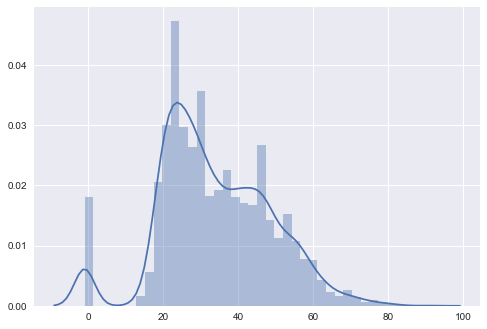

In [12]:
# graph age distritbution of participants
sns.distplot([int(x) if not x==' ' else -1 for x in df_data.age18])
plt.show()

### Demographic Information

Question 18a: What is your current gender identity?   
q18a1: Male, q18a2: Femanle, q18a3: Transgender Male to Female, q18a4: Transgender Female to Male, q18a5: Other
  
Question 18b: What was the sex on your birth certificate?    
q18b: 1-male, 2-female, 3-other     
  
Question 18c: Which label describes your sexual identity?    
q18c: 1-gay, 2-lesbian, 3-bisexual, 4-two spirit, 5-queer, 6-in the life, 7-same gender loving, 8-straight, 9-Macho/a, 10-Activo/a, 11-Pasivo/a, 12-other
  
Question 19: Which racial group comes closest to identifying you?      
q19a1: Black, q19a2: Hispanic or Latino/a,, q19a3: Asian or Pacific Islander, q19a4: Native American, q19a5: White, q19a6: Multiracial, q19a7: Other, q19a8: Ethnicity

In [17]:
df_data.shape

(4896, 304)

In [20]:
male_count = 0
for i in range(0, df_data.shape[0]):
    if df_data['q18a1'].values[i] == 1 or df_data['q18a1'].values[i] == '1':
        male_count = male_count + 1
print(male_count)

female_count = 0
for i in range(0, df_data.shape[0]):
    if df_data['q18a2'].values[i] == 1 or df_data['q18a2'].values[i] == '1':
        female_count = female_count + 1
print(female_count)

2301
2195


In [25]:
mean_age = 0
for y in [int(x) if not x==' ' else 0 for x in df_data.age18]:
    mean_age = mean_age + y
mean_age = mean_age/(df_data.shape[0])
print(mean_age)

33.989583333333336


In [26]:
std_age = 0
for z in [int(x) if not x==' ' else 0 for x in df_data.age18]:
    std_age = std_age + (z-mean_age)*(z-mean_age)
std_age = std_age/df_data.shape[0]
std_age = math.sqrt(std_age)
print(std_age)

14.681924917082135


### Free Responses

Question 2a: What are three most important issues facing you?     
Question 3: What are the three most imporatnt issues facing LGBT communities of color in the US?     

In [12]:
# Question 2a three most important issues facing you
df_data['q2a1'].drop_duplicates()

0                                     Financial stability
1                                      job discrimination
2                      homosexual discrimination in india
3                              learning to be a good ally
4                                        police brutality
5                                                    race
6                                   Racial discrimination
7                               employment discrimination
8                                       financial freedom
9                                  family and  communitie
10                           access to disability sources
11                                          HIV awareness
12                       cultural pressure to get married
13                                                       
14                          family dynamics/understanding
15                                            transphobia
17                                             unemployed
18            

In [13]:
# make list of all the columns with integer responses
numeric_responses = (0,1,2,3,4,5,6,7,11,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35    )
df_data[df_data.columns[35]].drop_duplicates()

0      1
1      6
3      4
4      3
5      2
7      5
52      
372    9
Name: q8d, dtype: object

### Mapping Df_Answers to PDF Responses

In [14]:
df_data.head()

,cid,sjsid,paper,spanish,g1,q1a,q1b,q1c,q2a1,q2a2,...,dnativeam,dwhite,dorace,age18,filter_black,q17d_medical,filter_hispanic,filter_asian,fq15b,fq15c
0,,10010157,0,0,,1,7,7,Financial stability,My Grandmother's health,...,,,,26,1,0,1,0,,6
1,,10010120,0,0,,1,1,2,job discrimination,housing discrimination,...,0,0,0,21,0,1,0,1,6,2
2,,11020070,1,0,,3,1,2,homosexual discrimination in india,employment non-discrimination,...,0,0,0,21,0,,0,1,2,1
3,,11020117,1,0,,1,2,1,learning to be a good ally,using my heterosexual privilege to work with LGBT,...,0,0,0,19,0,0,0,1,5,2
4,,11020144,1,0,,1,1,6,police brutality,war and militarism,...,0,0,0,29,0,0,0,1,2,3


In [15]:
df_map = pd.DataFrame()
df_map = pd.concat([df_map, df_data.sjsid], axis=1)

#### Section 1

In [16]:
df_map['q1a'] = [x if (x!=9 and x != ' ') else -1 for x in df_data.q1a]
df_map['q1b'] = [x if (x!=9 and x != ' ') else -1 for x in df_data.q1b]
df_map['q1c'] = [x if (x!=9 and x != ' ') else -1 for x in df_data.q1c]
df_map['q2a1'] = df_data.q2a1
df_map['q2a2'] = df_data.q2a2
df_map['q2a3'] = df_data.q2a3
df_map['q2b'] = [int(x) if (x!='9' and x != ' ') else -1 for x in df_data.q2b]
df_map['q3a1'] = df_data.q3a1
df_map['q3a2'] = df_data.q3a2
df_map['q3a3'] = df_data.q3a3
df_map['q3b'] = [int(x) if (x!='9' and x != ' ' and x!=9) else -1 for x in df_data.q3b]
df_map['q4a'] = [int(x) if (x!=9 and x != ' ') else -1 for x in df_data.q4a]
df_map['q4b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q4b]
df_map['q4c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q4c]
df_map['q4d'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q4d]
df_map['q5a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q5a]
df_map['q5b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q5b]
df_map['q5c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q5c]
df_map['q6a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q6a]
df_map['q6b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q6b]
df_map['q6c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q6c]
df_map['q7a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q7a]
df_map['q7b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q7b]
df_map['q7c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q7c]
df_map['q7d'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q7d]
df_map['q7e'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q7e]
df_map['q7f'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q7f]
df_map['q8a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q8a]
df_map['q8b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q8b]
df_map['q8c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q8c]
df_map['q8d'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q8d]
df_map['q8e'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q8e]
df_map['q8f'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q8f]
df_map['q9a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q9a]
df_map['q9b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q9b]
df_map['q9c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q9c]
df_map['q9d'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q9d]
df_map['q9e'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q9e]
df_map['q9f'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q9f]
df_map['q10a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q10a]
df_map['q10b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q10b]
df_map['q10c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q10c]
df_map['q10d'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q10d]
df_map['q10e'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q10e]
df_map['q10f'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q10f]
df_map.head()

,sjsid,q1a,q1b,q1c,q2a1,q2a2,q2a3,q2b,q3a1,q3a2,...,q9c,q9d,q9e,q9f,q10a,q10b,q10c,q10d,q10e,q10f
0,10010157,1,7,7,Financial stability,My Grandmother's health,The financial stabilty of my extended family,1,Discrimination,Marriage rights,...,4,5,1,1,1,1,1,1,1,1
1,10010120,1,1,2,job discrimination,housing discrimination,discrimination by law enforcement,3,job discrimination,housing discrimination,...,6,6,1,2,2,3,6,6,1,2
2,11020070,3,1,2,homosexual discrimination in india,employment non-discrimination,uafa + doma,1,enda,economic justice,...,3,3,1,2,1,2,2,3,1,1
3,11020117,1,2,1,learning to be a good ally,using my heterosexual privilege to work with LGBT,making my community aware to LGBT south asians,2,they are almost invisible,their own communties don't accept them,...,6,6,5,5,1,1,1,2,2,1
4,11020144,1,1,6,police brutality,war and militarism,"economic injustice in terms of low pay, unaffo...",1,police brutality/criminalization,war and militarism,...,5,5,5,4,2,3,3,4,2,4


#### Section 2

In [17]:
df_map['q11a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q11a]
df_map['q11b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q11b]
df_map['q11c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q11c]
df_map['q11d'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q11d]
df_map['q11e'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q11e]
df_map['q12a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q12a]
df_map['q12b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q12b]
df_map['q12c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q12c]
df_map['q12d'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q12d]
df_map.head()

,sjsid,q1a,q1b,q1c,q2a1,q2a2,q2a3,q2b,q3a1,q3a2,...,q10f,q11a,q11b,q11c,q11d,q11e,q12a,q12b,q12c,q12d
0,10010157,1,7,7,Financial stability,My Grandmother's health,The financial stabilty of my extended family,1,Discrimination,Marriage rights,...,1,4,4,2,4,4,8,7,4,3
1,10010120,1,1,2,job discrimination,housing discrimination,discrimination by law enforcement,3,job discrimination,housing discrimination,...,2,1,1,1,1,1,8,5,4,2
2,11020070,3,1,2,homosexual discrimination in india,employment non-discrimination,uafa + doma,1,enda,economic justice,...,1,1,1,1,1,1,8,6,4,4
3,11020117,1,2,1,learning to be a good ally,using my heterosexual privilege to work with LGBT,making my community aware to LGBT south asians,2,they are almost invisible,their own communties don't accept them,...,1,2,1,2,3,2,8,8,4,4
4,11020144,1,1,6,police brutality,war and militarism,"economic injustice in terms of low pay, unaffo...",1,police brutality/criminalization,war and militarism,...,4,3,3,3,3,4,8,8,3,2


#### Section 3

In [18]:
df_map['q13a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q13a]
df_map['q14a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q14a]
df_map['q14b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q14b]
df_map['q14c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q14c]
df_map['q14d'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q14d]
df_map['q14e'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q14e]
df_map['q14f'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q14f]
df_map['q15a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q15a]
df_map['q15b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q15b]
df_map['q15c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q15c]
df_map['q15d'] = [int(x) if (x!=' ') else -1 for x in df_data.q15d]
df_map['q16a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q16a]
df_map['q16b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q16b]
df_map.head()

,sjsid,q1a,q1b,q1c,q2a1,q2a2,q2a3,q2b,q3a1,q3a2,...,q14c,q14d,q14e,q14f,q15a,q15b,q15c,q15d,q16a,q16b
0,10010157,1,7,7,Financial stability,My Grandmother's health,The financial stabilty of my extended family,1,Discrimination,Marriage rights,...,8,8,8,8,-1,-1,1,-1,-1,6
1,10010120,1,1,2,job discrimination,housing discrimination,discrimination by law enforcement,3,job discrimination,housing discrimination,...,8,5,5,4,4,1,5,8,2,3
2,11020070,3,1,2,homosexual discrimination in india,employment non-discrimination,uafa + doma,1,enda,economic justice,...,8,5,4,5,2,5,6,15,2,5
3,11020117,1,2,1,learning to be a good ally,using my heterosexual privilege to work with LGBT,making my community aware to LGBT south asians,2,they are almost invisible,their own communties don't accept them,...,8,8,8,8,3,2,5,99,1,6
4,11020144,1,1,6,police brutality,war and militarism,"economic injustice in terms of low pay, unaffo...",1,police brutality/criminalization,war and militarism,...,4,5,5,5,4,5,4,13,2,6


#### Section 4

In [210]:
df_data.columns[180]

'q25'

In [190]:
numpy.unique(df_data['c1'].values)

array([' ', '0', '1'], dtype=object)

In [187]:
df_map['q17a'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q17a]
df_map['q17b'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q17b]
df_map['q17c'] = [int(x) if (x!=9 and x != ' ' and x!='9') else -1 for x in df_data.q17c]

# STILL NEED TO DO QUESTION 18a ABOUT GENDER IDENTITY (df_data.columns[81])

df_map['q18b'] = [int(x) if (x!='9' and x != ' ' and x!='9') else -1 for x in df_data.q18b]
df_map['q18c'] = [int(x) if (x != ' ' and x!='99') else -1 for x in df_data.q18c]

# STILL NEED TO DO QUESTION 18e ABOUT PARNTER (df_data.columns[91])
# STILL NEED TO DO QUESTION 18f ABOUT GUARDIAN (df_data.columns[98])

df_map['q18g'] = [int(x) if (x != ' ' and x!= None) else -1 for x in df_data.q18g]
df_map['age18'] = [int(x) if (x != ' ' and x!= None) else -1 for x in df_data.age18]

df_map['q20a'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q20a]
df_map['q20b'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q20b]
df_map['q20c'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q20c]
df_map['q21a'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q21a]
df_map['q21b'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q21b]
df_map['q21c'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q21c]
df_map['q22a'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q22a]
df_map['q22b'] = [int(x) if (x != ' ' and x!= None and x!='99' and x!=99) else -1 for x in df_data.q22b]
df_map['q22c'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q22c]
df_map['q22d1'] = [int(x) if (x != ' ' and x!= None and x!='99' and x!=99) else -1 for x in df_data.q22d1]
df_map['q22d2'] = [int(x) if (x != ' ' and x!= None and x!='99' and x!=99) else -1 for x in df_data.q22d2]
df_map['q22f'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q22f]
df_map['q23c'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q23c]
df_map['q24a'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q24a]
df_map['q24b'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q24b]
df_map['q24c'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q24c]
df_map['q24d'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q24d]
df_map['q25'] = [int(x) if (x != ' ' and x!= None and x!='9' and x!=9) else -1 for x in df_data.q25]

df_map.head()

,sjsid,q1a,q1b,q1c,q2a1,q2a2,q2a3,q2b,q3a1,q3a2,...,q22c,q22d1,q22d2,q22f,q23c,q24a,q24b,q24c,q24d,q25
0,10010157,1,7,7,Financial stability,My Grandmother's health,The financial stabilty of my extended family,1,Discrimination,Marriage rights,...,-1,-1,-1,0,1,4,4,4,4,4
1,10010120,1,1,2,job discrimination,housing discrimination,discrimination by law enforcement,3,job discrimination,housing discrimination,...,1,4,1,0,3,4,3,3,2,5
2,11020070,3,1,2,homosexual discrimination in india,employment non-discrimination,uafa + doma,1,enda,economic justice,...,0,0,0,0,1,2,2,2,2,3
3,11020117,1,2,1,learning to be a good ally,using my heterosexual privilege to work with LGBT,making my community aware to LGBT south asians,2,they are almost invisible,their own communties don't accept them,...,1,3,0,0,1,2,3,3,3,4
4,11020144,1,1,6,police brutality,war and militarism,"economic injustice in terms of low pay, unaffo...",1,police brutality/criminalization,war and militarism,...,0,2,0,0,1,2,2,2,2,2


In [212]:
%store df_map

Stored 'df_map' (DataFrame)


### How many people don't identify with their sex at birth?

In [22]:
gender_count = 0
for i in range(df_data.shape[0]):
    if df_data.q18a1.values[i] == '1' and df_data.q18b.values[i] != '1':
        gender_count = gender_count + 1
    elif df_data.q18a2.values[i] == '1' and df_data.q18b.values[i] != '2':
        gender_count = gender_count + 1
    elif df_data.q18a2.values[i] == '1' or df_data.q18a4.values[i] == '1':
        gender_count = gender_count + 1
print(gender_count)

2313


### Cluster Questions with Age

In [23]:
from sklearn.cluster import KMeans
from scipy import cluster
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [24]:
def graph_clusters(labels ,data): 
    markers = ['+', 'o', '*', 'v', '^', '-', '#']
    colors = ['r', 'b', 'g', 'k']
    
    for i in range(0, len(data)):
        pyplot.scatter(data.iloc[i, 0], data.iloc[i, 1], c=colors[labels[i]], marker=markers[labels[i]])
    
    pyplot.show()

#### 1(a): How often do you attend a racial or ethnic LGBT pride festival


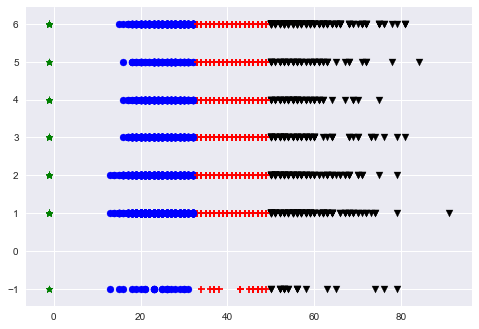

In [33]:
# Cluster by age (18g)
kmeans_q1a_age = KMeans(n_clusters=4).fit(df_map[['age18','q1a']])
graph_clusters(kmeans_q1a_age.labels_, df_map[['age18','q1a']]

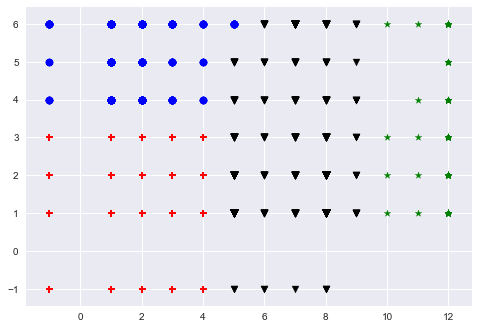

In [43]:
# Cluster by sexual orientation (18c)
kmeans_q1a_sexual = KMeans(n_clusters=4).fit(df_map[['q18c','q1a']])
graph_clusters(kmeans_q1a_sexual.labels_, df_map[['q18c','q1a']])

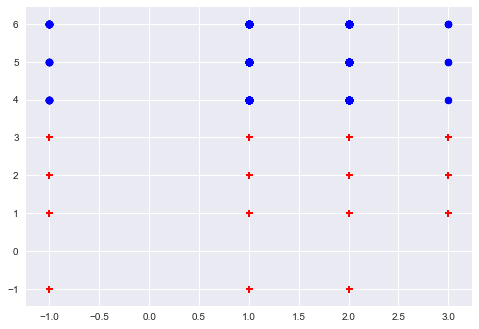

In [48]:
# Cluster by gender (18b)
kmeans_q1a_sexual = KMeans(n_clusters=2).fit(df_map[['q18b','q1a']])
graph_clusters(kmeans_q1a_sexual.labels_, df_map[['q18b','q1a']])

In [63]:
for i in range(1, len(df_map.columns)):
    print(df_map[df_map.columns[i]].dtype)

AttributeError: 'DataFrame' object has no attribute 'dtype'

### Loop Through Questions

q2b Age


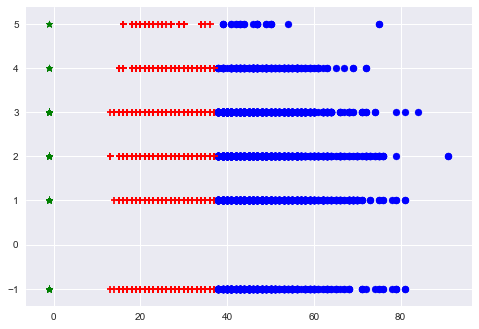

q2b Sexual Orientation


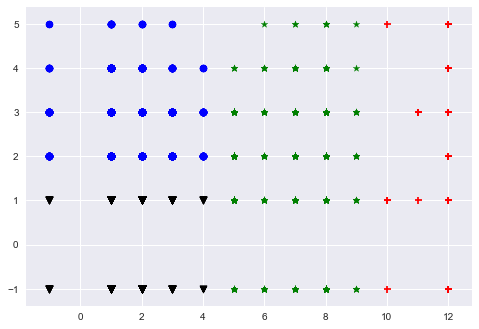

q2b Gender


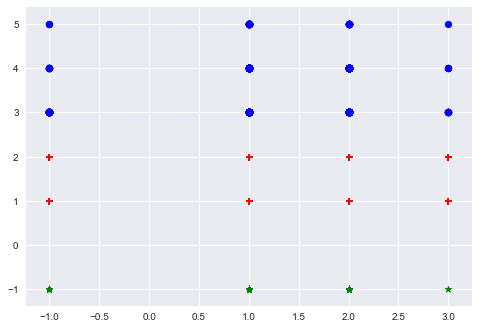

q3b Age


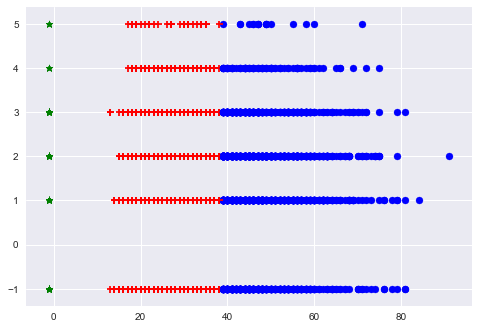

q3b Sexual Orientation


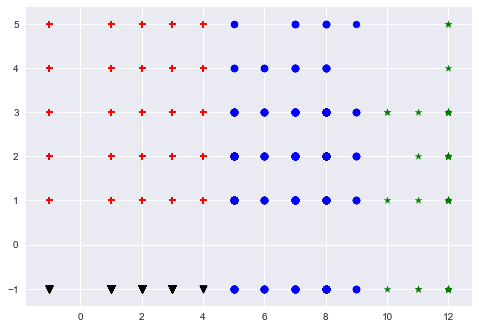

q3b Gender


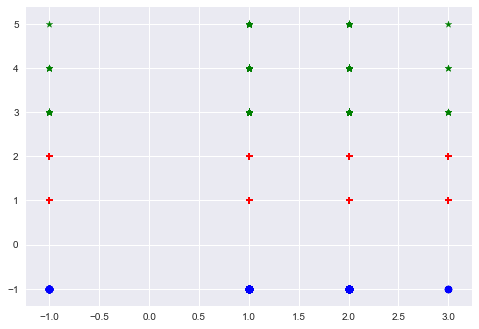

q4a Age


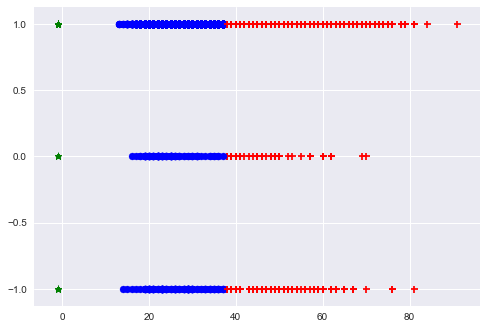

q4a Sexual Orientation


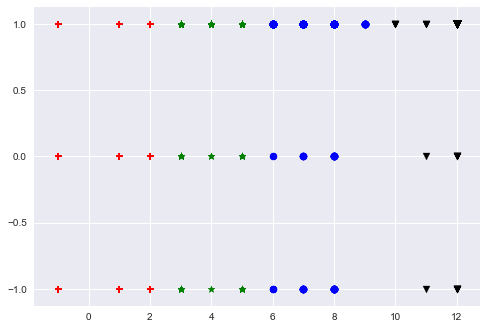

q4a Gender


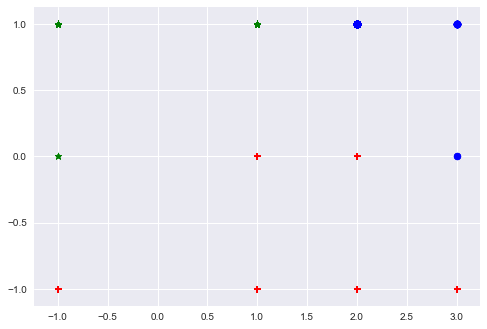

q4b Age


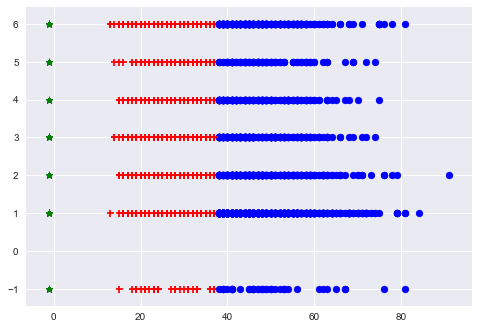

q4b Sexual Orientation


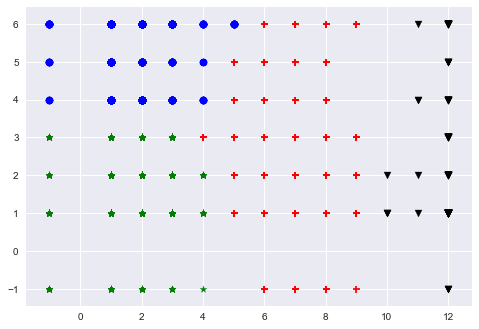

q4b Gender


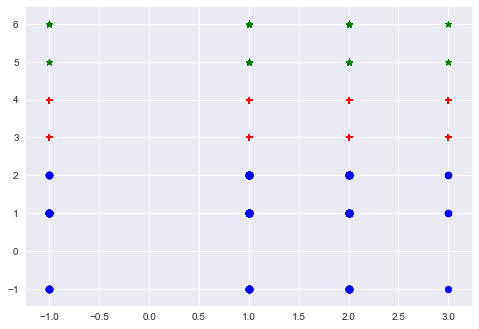

q4c Age


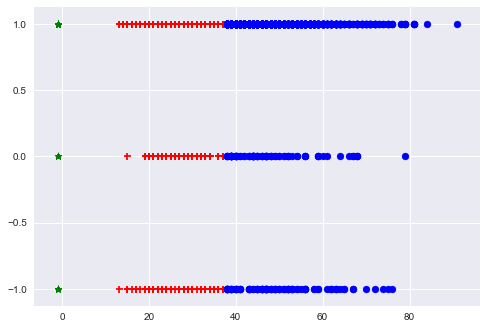

q4c Sexual Orientation


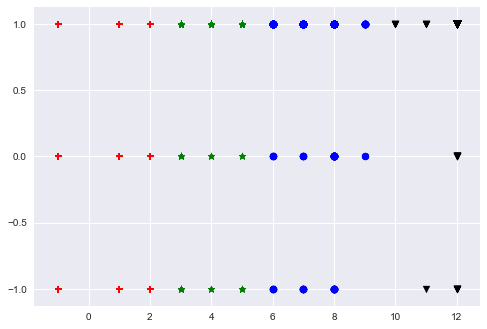

q4c Gender


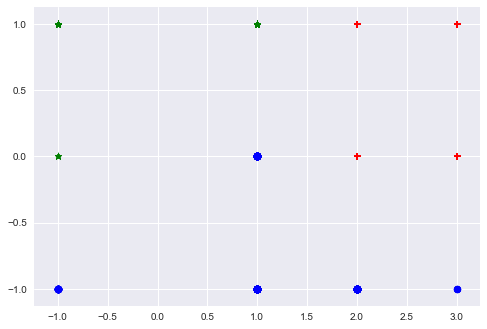

q4d Age


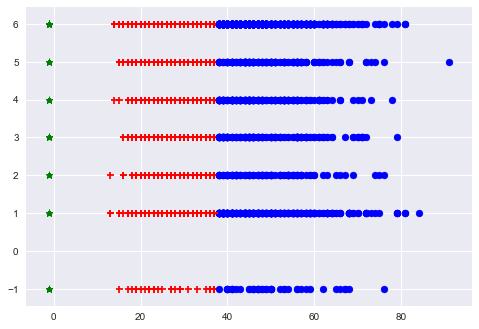

q4d Sexual Orientation


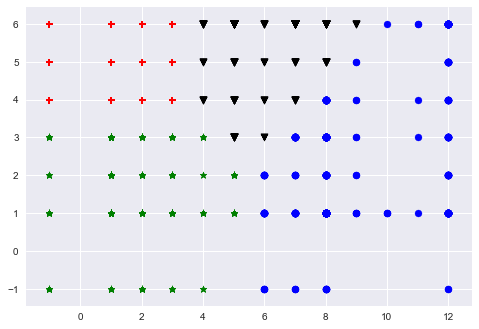

q4d Gender


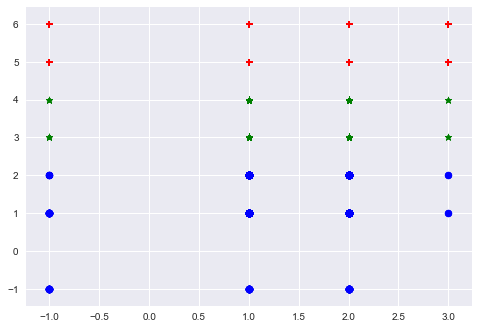

q5a Age


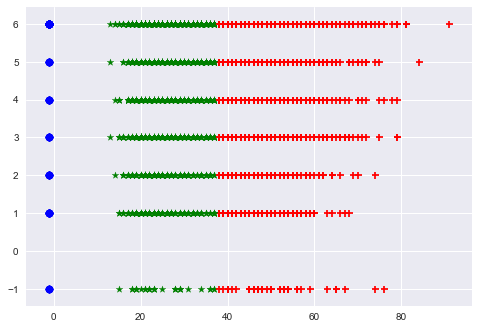

q5a Sexual Orientation


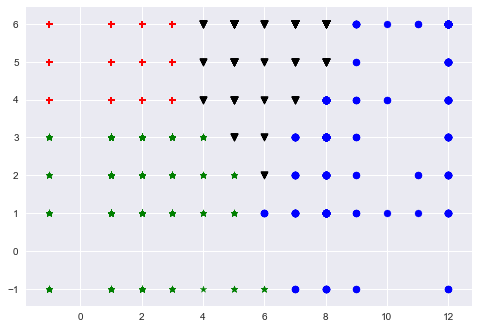

q5a Gender


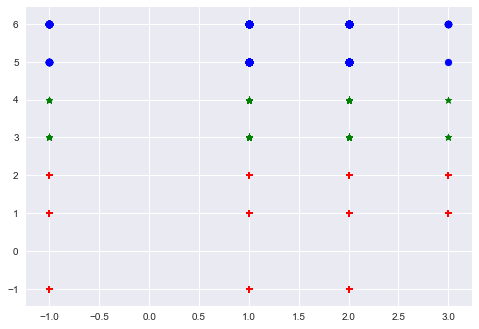

q5b Age


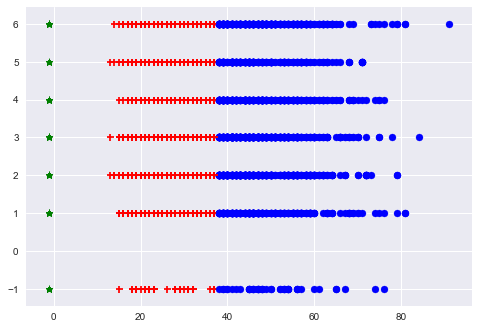

q5b Sexual Orientation


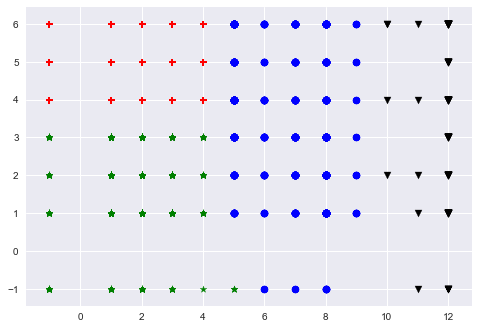

q5b Gender


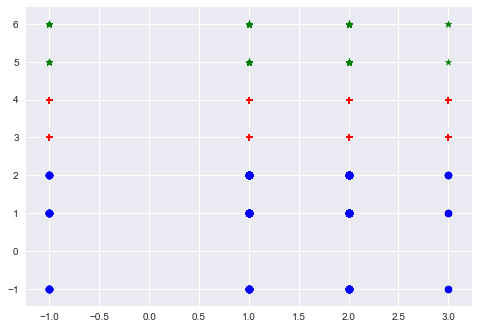

q5c Age


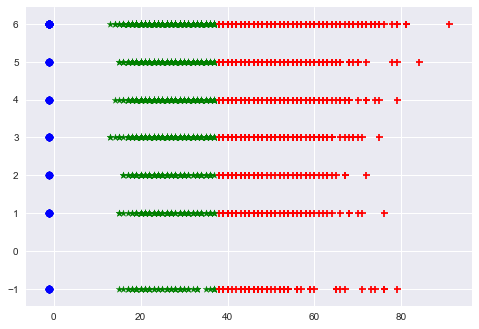

q5c Sexual Orientation


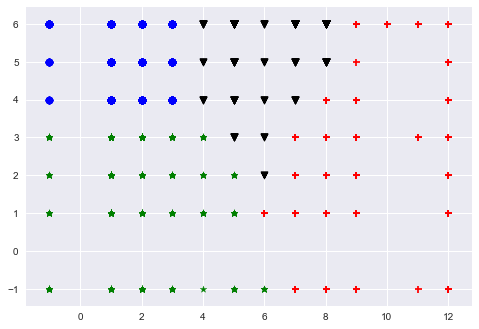

q5c Gender


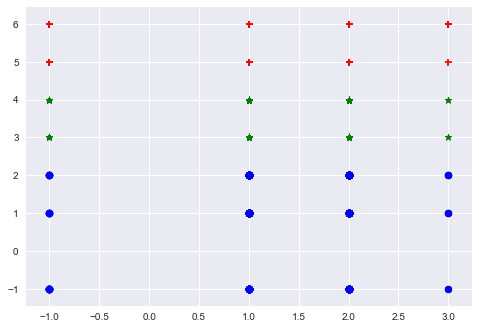

q6a Age


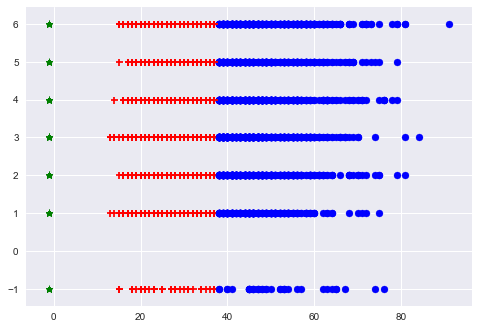

q6a Sexual Orientation


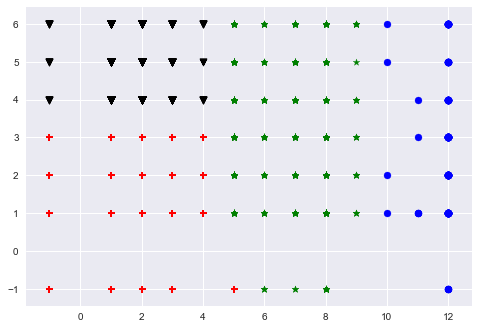

q6a Gender


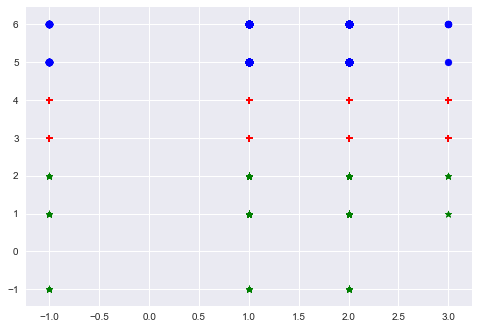

q6b Age


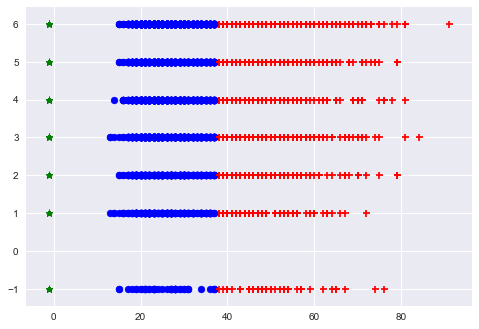

q6b Sexual Orientation


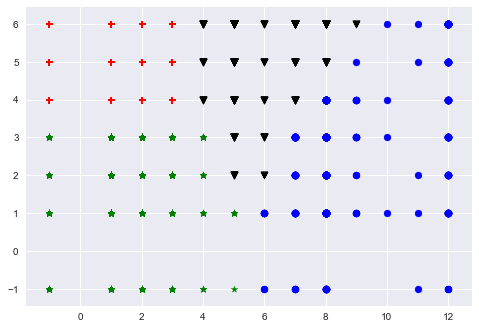

q6b Gender


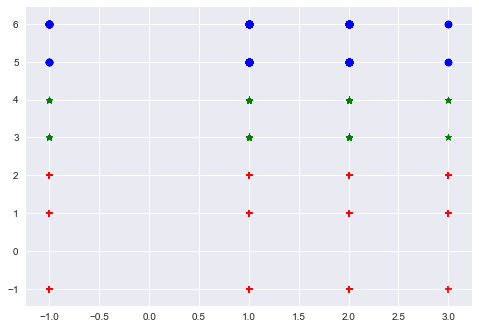

q6c Age


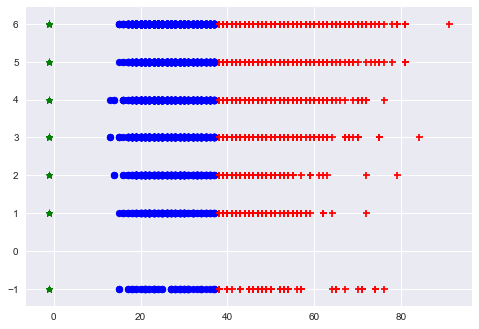

q6c Sexual Orientation


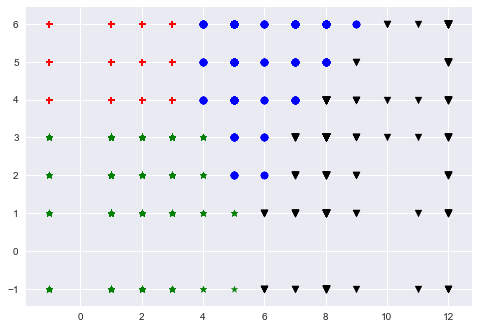

q6c Gender


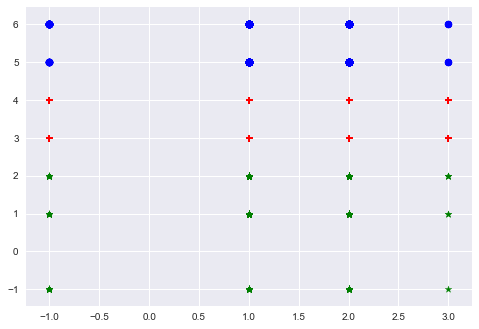

q7a Age


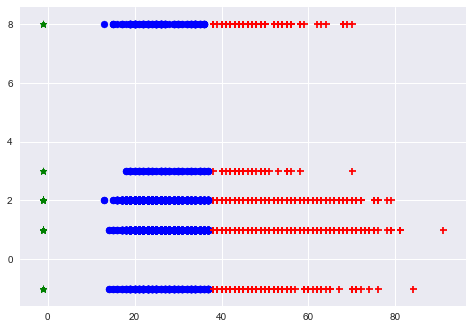

q7a Sexual Orientation


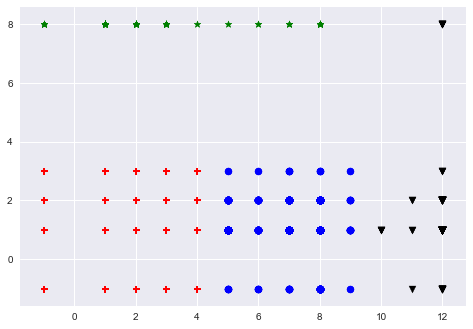

q7a Gender


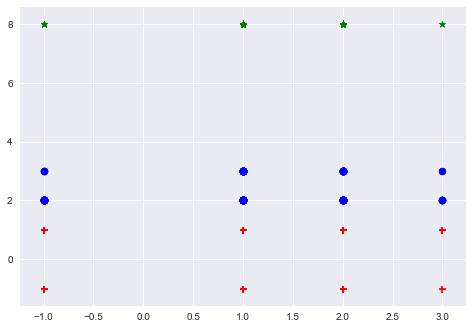

q7b Age


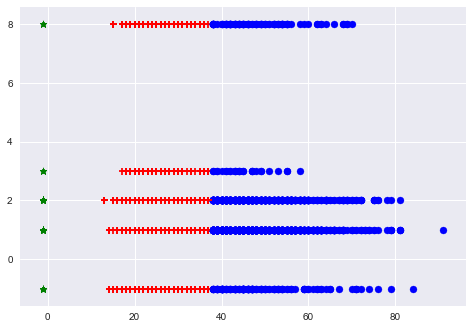

q7b Sexual Orientation


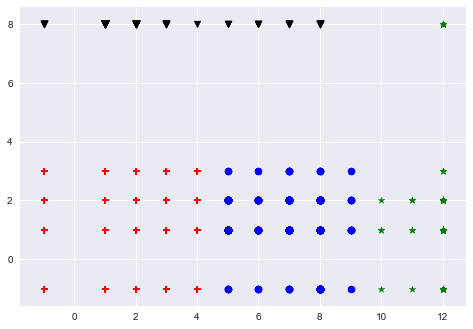

q7b Gender


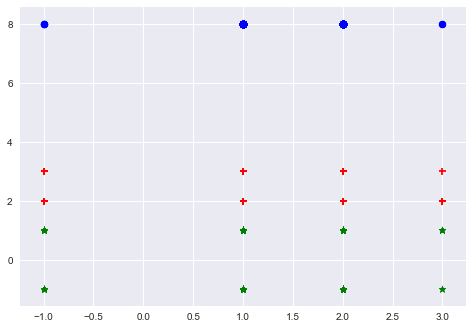

q7c Age


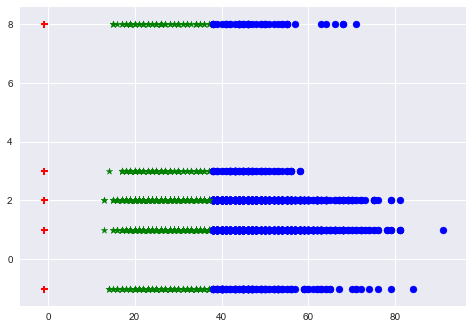

q7c Sexual Orientation


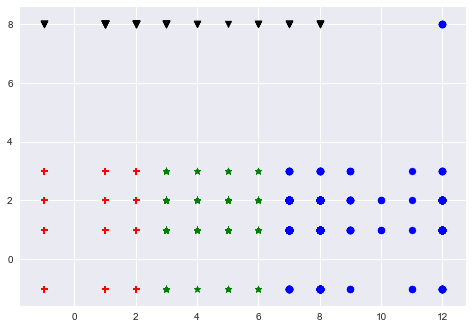

q7c Gender


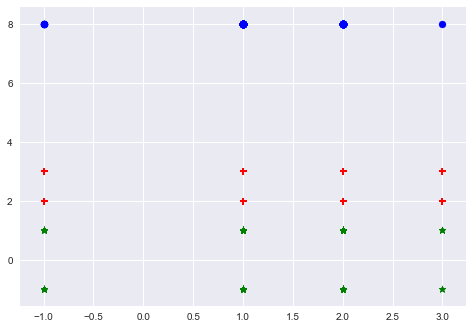

q7d Age


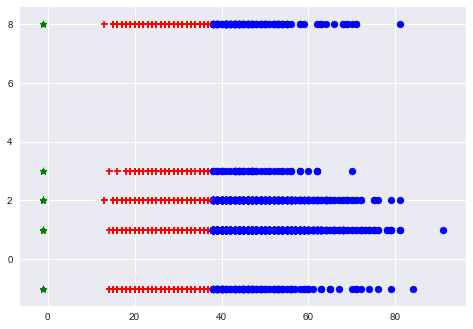

q7d Sexual Orientation


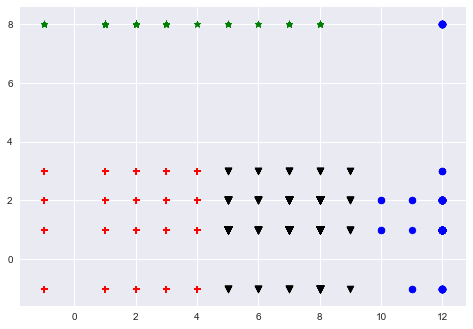

q7d Gender


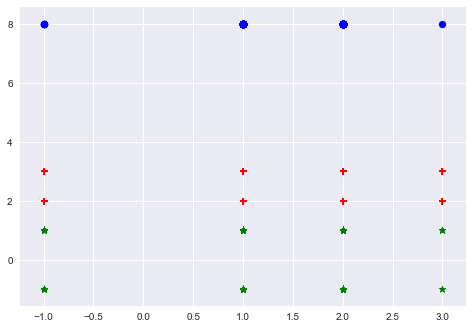

q7e Age


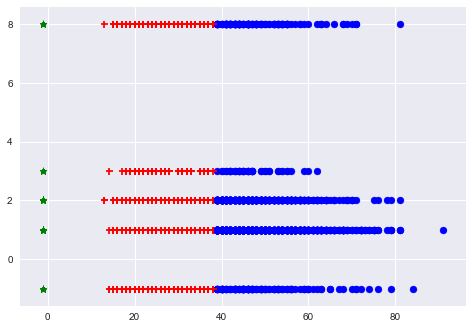

q7e Sexual Orientation


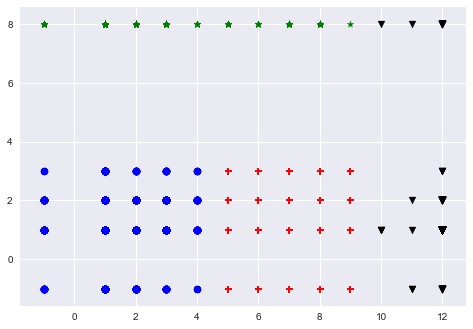

q7e Gender


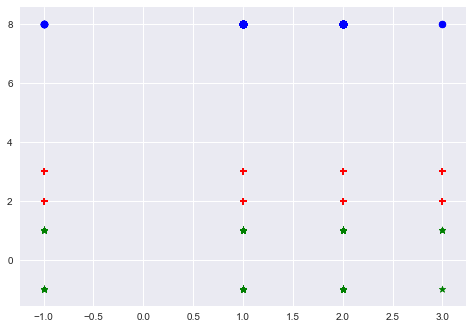

q7f Age


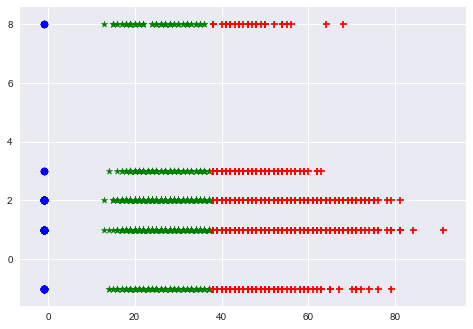

q7f Sexual Orientation


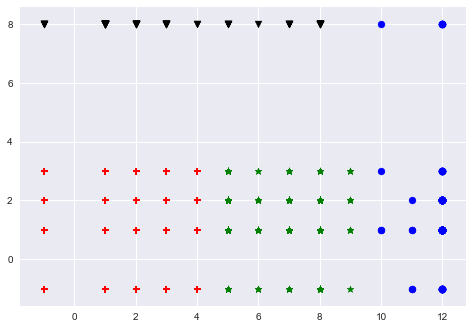

q7f Gender


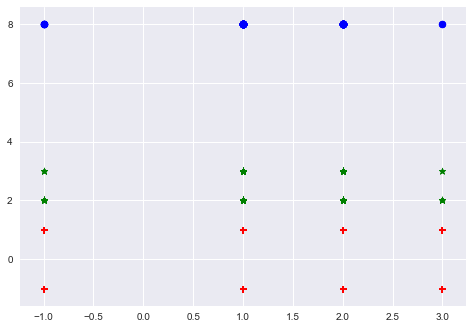

q8a Age


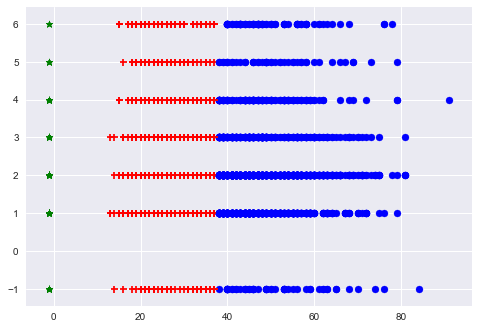

q8a Sexual Orientation


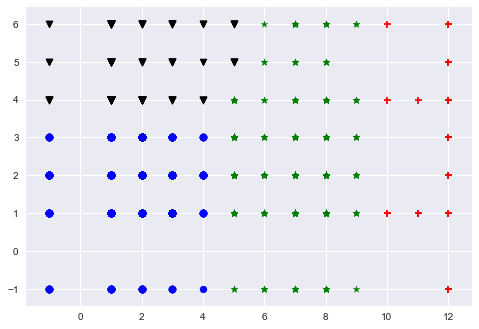

q8a Gender


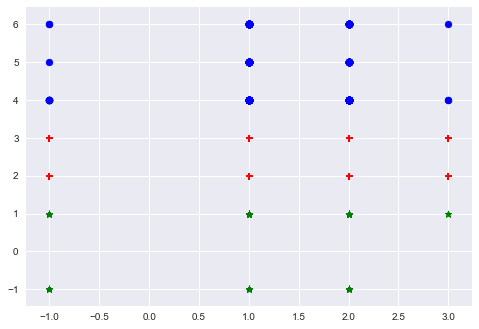

q8b Age


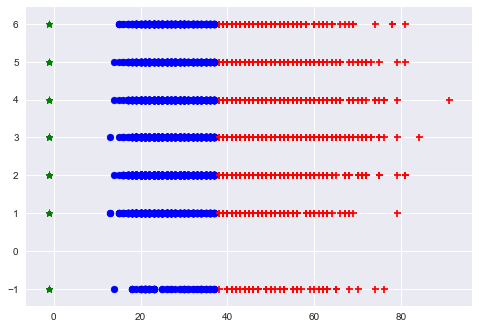

q8b Sexual Orientation


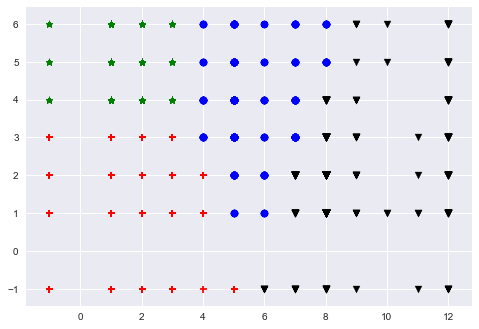

q8b Gender


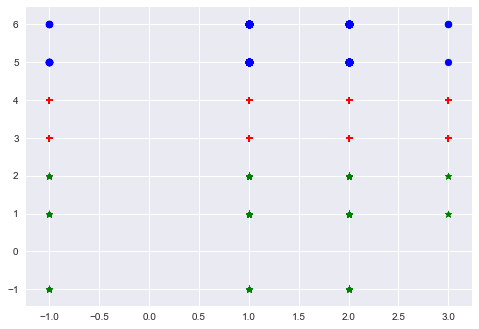

q8c Age


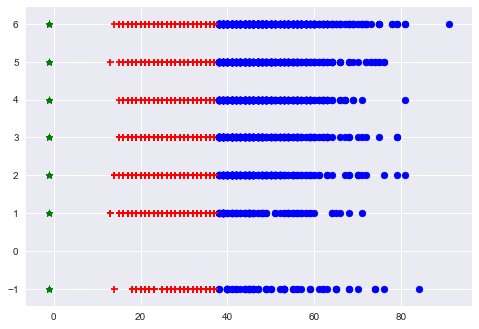

q8c Sexual Orientation


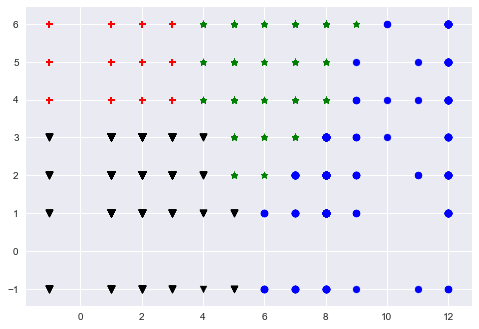

q8c Gender


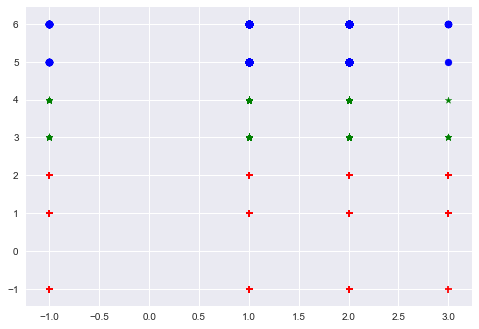

q8d Age


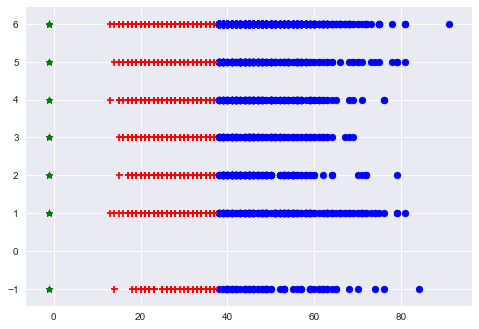

q8d Sexual Orientation


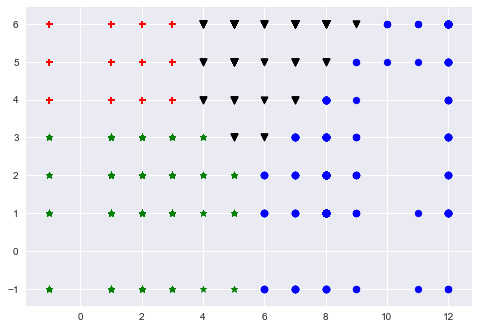

q8d Gender


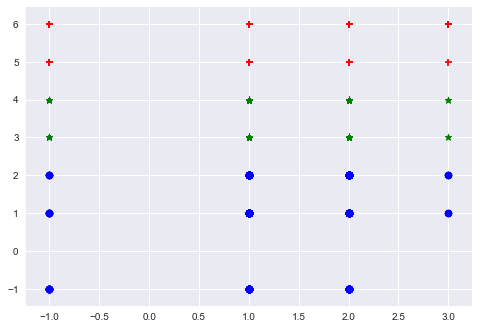

q8e Age


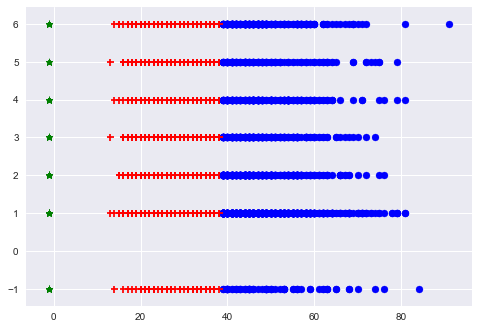

q8e Sexual Orientation


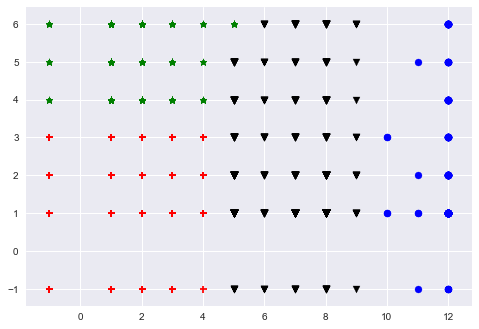

q8e Gender


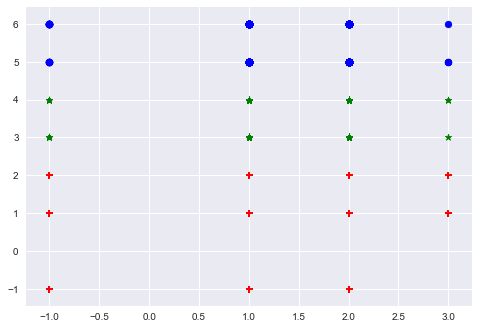

q8f Age


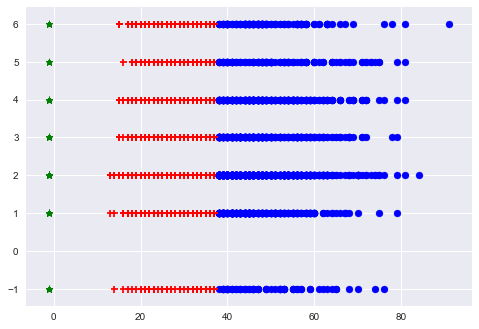

q8f Sexual Orientation


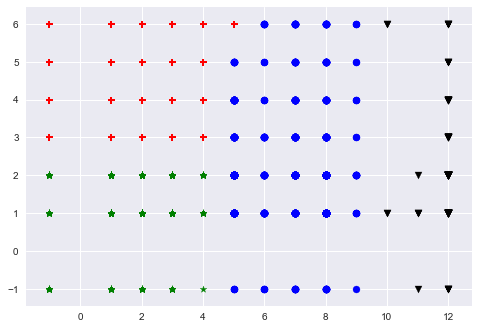

q8f Gender


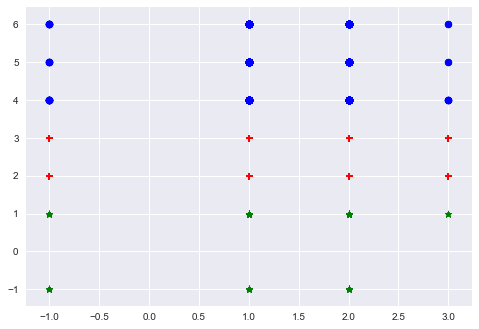

q9a Age


In [ ]:
for i in range(4, len(df_map.columns)):
    if df_map[df_map.columns[i]].dtype == object:
        continue
    
    # Cluster by age
    print(df_map.columns[i], "Age")
    graph_clusters(KMeans(n_clusters=3).fit(df_map[['age18',df_map.columns[i]]]).labels_, 
                   df_map[['age18',df_map.columns[i]]])
    
    # Cluster by sexual orientation
    print(df_map.columns[i], "Sexual Orientation")
    graph_clusters(KMeans(n_clusters=4).fit(df_map[['q18c',df_map.columns[i]]]).labels_, 
                   df_map[['q18c',df_map.columns[i]]])
    
    # Cluster by gender
    print(df_map.columns[i], "Gender")
    graph_clusters(KMeans(n_clusters=3).fit(df_map[['q18b',df_map.columns[i]]]).labels_, 
                   df_map[['q18b',df_map.columns[i]]])
    
    if df_map.columns[i] == 'q16b':
        break

## Single Value Decomposition

In [25]:
# only take numberical cells for questions from df_data
df_num_map = pd.DataFrame([])

for i in range(1, len(df_map.columns)):
    if df_map[df_map.columns[i]].dtype != 'object':
        df_num_map[df_map.columns[i]] = df_map[df_map.columns[i]]
    
    if df_map.columns[i] == 'q10f':
        break

In [26]:
df_num_map['age'] = df_map['age18']
df_num_map['sexual_orient'] = df_map['q18c']
df_num_map['gender'] = df_map['q18b']
df_num_map.head()

,q1a,q1b,q1c,q2b,q3b,q4a,q4b,q4c,q4d,q5a,...,q9f,q10a,q10b,q10c,q10d,q10e,q10f,age,sexual_orient,gender
0,1,7,7,1,1,1,1,0,1,6,...,1,1,1,1,1,1,1,26,8,2
1,1,1,2,3,3,1,4,1,5,6,...,2,2,3,6,6,1,2,21,3,2
2,3,1,2,1,2,1,2,1,4,6,...,2,1,2,2,3,1,1,21,2,2
3,1,2,1,2,2,1,2,1,6,6,...,5,1,1,1,2,2,1,19,8,2
4,1,1,6,1,1,1,1,1,2,6,...,4,2,3,3,4,2,4,29,5,1


In [52]:
from sklearn import preprocessing

df_num_map_scale = preprocessing.scale(df_num_map)

In [53]:
u, s, v = numpy.linalg.svd(df_num_map_scale)

In [54]:
print(u.shape, s.shape, v.shape)

(4896, 4896) (42,) (42, 42)


In [55]:
print(s)

[ 210.28849302  137.33478152  121.94109957   95.95797853   91.84654089
   86.04887648   82.55689904   80.82896915   78.84039246   75.8586533
   73.17946706   72.26122202   67.59794066   66.89007563   63.88716069
   61.60843118   60.35246552   59.18244427   57.92045394   54.90365035
   52.35334877   51.51487895   50.88798259   49.86933446   49.24320525
   47.18845894   45.89621336   44.05022256   42.30195688   41.26770448
   40.75274964   40.31575609   40.17939514   34.87105942   33.74253171
   33.62585384   32.89045749   31.84874094   30.92965099   28.12985835
   27.26141194   25.79917412]


In [56]:
sum = 0
for i in range(0, len(s)):
    sum = s[i]*s[i] + sum

sum = math.sqrt(sum)

In [57]:
normalized_s = [s[0]/sum]
for i in range(1, len(s)):
    normalized_s.append((s[i]/sum)*(s[i]/sum))

In [58]:
normalized_s

[0.46373530310052363,
 0.091721338196104354,
 0.072311856933876498,
 0.044778700022980601,
 0.041023707757658318,
 0.036008058782601222,
 0.033144848951331941,
 0.031771914165319146,
 0.03022782195106018,
 0.027984629246533985,
 0.026042806560019057,
 0.025393344458092569,
 0.022221646345463298,
 0.021758686479389826,
 0.019848901438426932,
 0.018458210746328699,
 0.017713294112490993,
 0.017033154905664333,
 0.016314479187137888,
 0.014659249640267788,
 0.013329020423109041,
 0.01290549502722358,
 0.012593306353081535,
 0.012094180475267193,
 0.011792392541418133,
 0.010828813886585366,
 0.010243845320336216,
 0.009436382020961271,
 0.0087022231732261507,
 0.008281898892963338,
 0.0080764988082793546,
 0.0079042181616237883,
 0.0078508393329715619,
 0.0059134316883485104,
 0.0055368738637856666,
 0.0054986482951685164,
 0.0052607677512442321,
 0.0049328037432969244,
 0.0046522103094950966,
 0.0038480826454754128,
 0.0036141484839140093,
 0.0032368375797428967]

# Random Forest

In [60]:
df_num_map.head()

,q1a,q1b,q1c,q2b,q3b,q4a,q4b,q4c,q4d,q5a,...,q9f,q10a,q10b,q10c,q10d,q10e,q10f,age,sexual_orient,gender
0,1,7,7,1,1,1,1,0,1,6,...,1,1,1,1,1,1,1,26,8,2
1,1,1,2,3,3,1,4,1,5,6,...,2,2,3,6,6,1,2,21,3,2
2,3,1,2,1,2,1,2,1,4,6,...,2,1,2,2,3,1,1,21,2,2
3,1,2,1,2,2,1,2,1,6,6,...,5,1,1,1,2,2,1,19,8,2
4,1,1,6,1,1,1,1,1,2,6,...,4,2,3,3,4,2,4,29,5,1


### Random Forest: Age

In [67]:
# random forest for age
age_features = df_num_map.iloc[:, :39]
age_target = df_num_map.iloc[:, 39]

from sklearn.model_selection import train_test_split
age_feat_train, age_feat_test, age_tar_train, age_tar_test = train_test_split(
    age_features, age_target, test_size=0.3, random_state=123456)

from sklearn.ensemble import RandomForestRegressor
age_rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123456)
age_rf.fit(age_feat_train, age_tar_train)

from sklearn.metrics import mean_absolute_error
age_mae = mean_absolute_error(age_rf.predict(age_feat_test), age_tar_test)
print(age_mae)

10.6291625096


Feature ranking:
1. feature 0 (0.059641)
2. feature 23 (0.038295)
3. feature 26 (0.038270)
4. feature 6 (0.037329)
5. feature 24 (0.036328)
6. feature 8 (0.033742)
7. feature 2 (0.032236)
8. feature 12 (0.030817)
9. feature 14 (0.030550)
10. feature 22 (0.030486)
11. feature 1 (0.030398)
12. feature 13 (0.030051)
13. feature 11 (0.028912)
14. feature 10 (0.028675)
15. feature 9 (0.027333)
16. feature 4 (0.027262)
17. feature 3 (0.026616)
18. feature 30 (0.026089)
19. feature 28 (0.025916)
20. feature 19 (0.024697)
21. feature 25 (0.023856)
22. feature 21 (0.023160)
23. feature 31 (0.022567)
24. feature 29 (0.022252)
25. feature 38 (0.022116)
26. feature 32 (0.021856)
27. feature 27 (0.020861)
28. feature 37 (0.020758)
29. feature 36 (0.020311)
30. feature 35 (0.019585)
31. feature 15 (0.018183)
32. feature 33 (0.017913)
33. feature 34 (0.017787)
34. feature 17 (0.017295)
35. feature 16 (0.016292)
36. feature 18 (0.015126)
37. feature 20 (0.013402)
38. feature 7 (0.011667)
39. feature 5

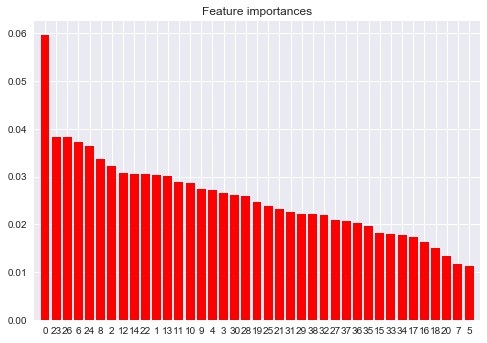

In [70]:
import numpy as np
age_importances = age_rf.feature_importances_

std = np.std([age_importances for tree in age_rf.estimators_],
             axis=0)
indices = np.argsort(age_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(age_features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], age_importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(age_features.shape[1]), age_importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(age_features.shape[1]), indices)
plt.xlim([-1, age_features.shape[1]])
plt.show()

### Random Forest: Sexual Orientation

In [71]:
# random forest for age
sex_features = df_num_map.iloc[:, :39]
sex_target = df_num_map.iloc[:, 40]

from sklearn.model_selection import train_test_split
sex_feat_train, sex_feat_test, sex_tar_train, sex_tar_test = train_test_split(
    sex_features, sex_target, test_size=0.3, random_state=123456)

from sklearn.ensemble import RandomForestClassifier
sex_rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
sex_rf.fit(sex_feat_train, sex_tar_train)

from sklearn.metrics import accuracy_score
sex_acc = accuracy_score(sex_rf.predict(sex_feat_test), sex_tar_test)
print(sex_acc)

0.375085091899


Feature ranking:
1. feature 1 (0.036532)
2. feature 2 (0.035558)
3. feature 10 (0.033698)
4. feature 0 (0.032420)
5. feature 8 (0.032382)
6. feature 6 (0.031800)
7. feature 12 (0.031454)
8. feature 13 (0.030905)
9. feature 14 (0.030547)
10. feature 23 (0.030303)
11. feature 9 (0.030175)
12. feature 11 (0.030126)
13. feature 22 (0.030008)
14. feature 4 (0.029659)
15. feature 3 (0.028623)
16. feature 26 (0.028324)
17. feature 29 (0.028034)
18. feature 28 (0.027614)
19. feature 24 (0.027443)
20. feature 25 (0.026601)
21. feature 35 (0.026227)
22. feature 30 (0.025625)
23. feature 34 (0.025392)
24. feature 36 (0.025363)
25. feature 21 (0.024726)
26. feature 32 (0.024719)
27. feature 31 (0.023243)
28. feature 27 (0.022850)
29. feature 38 (0.021849)
30. feature 33 (0.021540)
31. feature 37 (0.021458)
32. feature 20 (0.020272)
33. feature 19 (0.019205)
34. feature 18 (0.019190)
35. feature 17 (0.018212)
36. feature 16 (0.017586)
37. feature 15 (0.016800)
38. feature 7 (0.007025)
39. feature 5

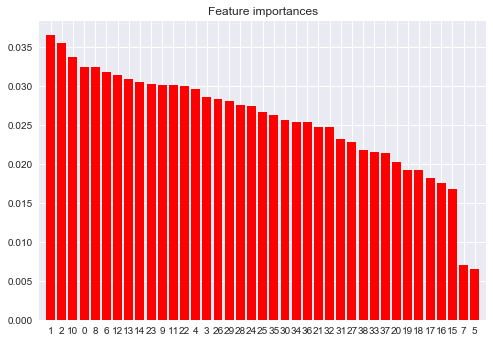

In [72]:
import numpy as np
sex_importances = sex_rf.feature_importances_

std = np.std([sex_importances for tree in sex_rf.estimators_],
             axis=0)
indices = np.argsort(sex_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(sex_features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], sex_importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(sex_features.shape[1]), sex_importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(sex_features.shape[1]), indices)
plt.xlim([-1, sex_features.shape[1]])
plt.show()

### Random Forest: Gender

In [74]:
# random forest for age
gen_features = df_num_map.iloc[:, :39]
gen_target = df_num_map.iloc[:, 41]

from sklearn.model_selection import train_test_split
gen_feat_train, gen_feat_test, gen_tar_train, gen_tar_test = train_test_split(
    gen_features, gen_target, test_size=0.3, random_state=123456)

from sklearn.ensemble import RandomForestClassifier
gen_rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
gen_rf.fit(gen_feat_train, gen_tar_train)

from sklearn.metrics import accuracy_score
gen_acc = accuracy_score(gen_rf.predict(gen_feat_test), gen_tar_test)
print(gen_acc)

0.578624914908


Feature ranking:
1. feature 1 (0.038100)
2. feature 2 (0.034935)
3. feature 10 (0.033372)
4. feature 6 (0.033364)
5. feature 14 (0.033349)
6. feature 12 (0.032637)
7. feature 24 (0.032042)
8. feature 4 (0.031155)
9. feature 23 (0.031139)
10. feature 9 (0.030967)
11. feature 13 (0.030126)
12. feature 22 (0.030108)
13. feature 0 (0.030029)
14. feature 11 (0.028523)
15. feature 8 (0.028477)
16. feature 3 (0.028315)
17. feature 26 (0.028121)
18. feature 25 (0.027509)
19. feature 29 (0.026582)
20. feature 28 (0.026138)
21. feature 30 (0.025965)
22. feature 36 (0.025502)
23. feature 35 (0.025435)
24. feature 34 (0.025319)
25. feature 31 (0.023731)
26. feature 32 (0.023668)
27. feature 21 (0.022487)
28. feature 37 (0.022062)
29. feature 33 (0.021962)
30. feature 38 (0.021817)
31. feature 27 (0.021318)
32. feature 18 (0.020745)
33. feature 19 (0.020441)
34. feature 20 (0.018912)
35. feature 17 (0.017871)
36. feature 15 (0.016726)
37. feature 16 (0.016034)
38. feature 7 (0.008384)
39. feature 5

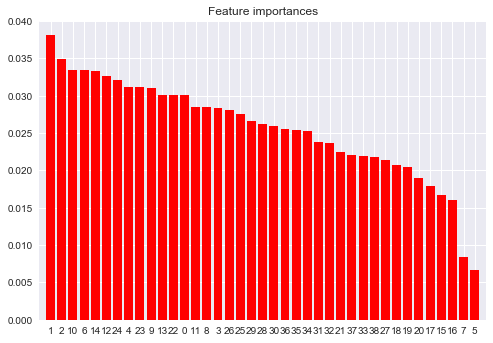

In [75]:
import numpy as np
gen_importances = gen_rf.feature_importances_

std = np.std([gen_importances for tree in gen_rf.estimators_],
             axis=0)
indices = np.argsort(gen_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(gen_features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], gen_importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(gen_features.shape[1]), gen_importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(gen_features.shape[1]), indices)
plt.xlim([-1, gen_features.shape[1]])
plt.show()